# Bài thực hành số 2

Chào mừng đến với bài thực hành số 2, trong bài thực hành này ta sẽ học về thuật toán nhận diện cạnh Canny, các bước xử lí và áp dụng Canny vào ảnh, video thực tế.

## Hướng dẫn

Dưới đây là hướng dẫn chi tiết các bước để bạn có thể lập trình và áp dụng Canny vào thực tế.


### Thư viện



In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Đọc ảnh


In [ ]:
image_path = "/content/road_2.jpg"
# Đọc ảnh và trả về một ma trận 3 chiều ứng với các kênh màu B,G,R
img = cv2.imread(image_path)
# Hiển thị ảnh lên cửa sổ giao diện
cv2_imshow(img)

### Làm mờ ảnh (Gaussian Blur)

#### Lời giải bài tập 1

In [ ]:
def gaussian_blur(image, kernel_size=5, sigma=1.4):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)

In [ ]:
# Load image and convert to grayscale
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred_image = gaussian_blur(gray_image)

#### Kết quả

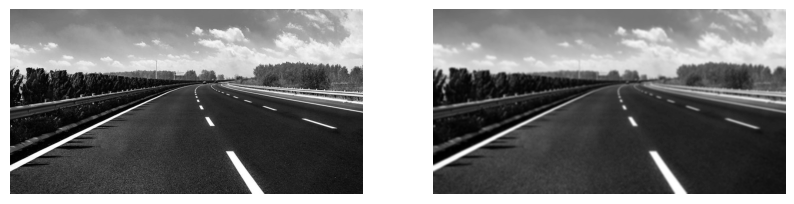

In [ ]:
# Tạo một figure với 2 subplot
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Hiển thị ảnh đầu tiên
axs[0].imshow(gray_image, cmap='gray')
axs[0].axis('off')  # Tắt hiển thị trục

# Hiển thị ảnh thứ hai
axs[1].imshow(blurred_image, cmap='gray')
axs[1].axis('off')  # Tắt hiển thị trục

# Hiển thị figure
plt.show()

### Tính Gradient (Gradient Calculation)


#### Lời giải bài tập 2

In [ ]:
def gradient(image):
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    gradient_magnitude = np.hypot(sobelx, sobely)
    gradient_direction = np.arctan2(sobely, sobelx)
    return gradient_magnitude, gradient_direction

In [ ]:
gradient_magnitude, gradient_direction = gradient(blurred_image)

#### Kết quả

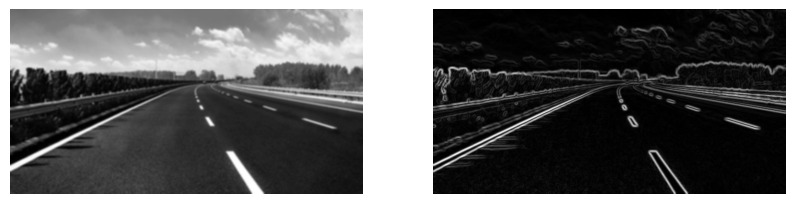

In [ ]:
# Tạo một figure với 2 subplot
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Hiển thị ảnh đầu tiên
axs[0].imshow(blurred_image, cmap='gray')
axs[0].axis('off')  # Tắt hiển thị trục

# Hiển thị ảnh thứ hai
axs[1].imshow(gradient_magnitude, cmap='gray')
axs[1].axis('off')  # Tắt hiển thị trục

# Hiển thị figure
plt.show()

### Không cực đại hóa (Non-maximum Suppression)


#### Lời giải bài tập 3

In [ ]:
def non_maximum_suppression(gradient_magnitude, gradient_direction):
    M, N = gradient_magnitude.shape
    Z = np.zeros((M, N), dtype=np.float32)
    angle = gradient_direction * 180. / np.pi
    angle[angle < 0] += 180

    for i in range(1, M-1):
        for j in range(1, N-1):
            try:
                q = 255
                r = 255

                ### Your code starts here ###
                # Angle 0
                if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
                    q = gradient_magnitude[i, j + 1]
                    r = gradient_magnitude[i, j - 1]
                # Angle 45
                elif 22.5 <= angle[i, j] < 67.5:
                    q = gradient_magnitude[i + 1, j - 1]
                    r = gradient_magnitude[i - 1, j + 1]
                # Angle 90
                elif 67.5 <= angle[i, j] < 112.5:
                    q = gradient_magnitude[i + 1, j]
                    r = gradient_magnitude[i - 1, j]
                # Angle 135
                elif 112.5 <= angle[i, j] < 157.5:
                    q = gradient_magnitude[i - 1, j - 1]
                    r = gradient_magnitude[i + 1, j + 1]
                ### Your code ends here ###

                if (gradient_magnitude[i, j] >= q) and (gradient_magnitude[i, j] >= r):
                    Z[i, j] = gradient_magnitude[i, j]
                else:
                    Z[i, j] = 0

            except IndexError as e:
                pass

    return Z

In [ ]:
nms_image = non_maximum_suppression(gradient_magnitude, gradient_direction)

#### Kết quả

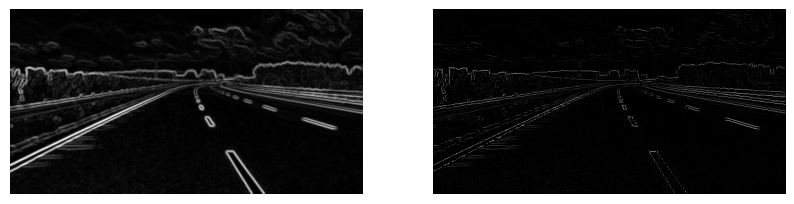

In [ ]:
# Tạo một figure với 2 subplot
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Hiển thị ảnh đầu tiên
axs[0].imshow(gradient_magnitude, cmap='gray')
axs[0].axis('off')  # Tắt hiển thị trục

# Hiển thị ảnh thứ hai
axs[1].imshow(nms_image, cmap='gray')
axs[1].axis('off')  # Tắt hiển thị trục

# Hiển thị figure
plt.show()

### Ngưỡng hóa kép (Double Threshold)


#### Lời giải bài tập 4


In [ ]:
def double_threshold(image, low_threshold, high_threshold):
    strong = 255
    weak = 50
    strong_i, strong_j = np.where(image >= high_threshold)
    weak_i, weak_j = np.where((image >= low_threshold) & (image < high_threshold))

    result = np.zeros_like(image)
    result[strong_i, strong_j] = strong
    result[weak_i, weak_j] = weak

    return result

In [ ]:
low_threshold = 0.05 * nms_image.max()
high_threshold = 0.15 * nms_image.max()
thresholded_image = double_threshold(nms_image, low_threshold, high_threshold)

#### Kết quả

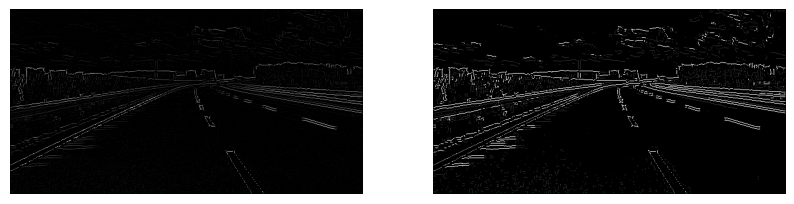

In [ ]:
# Tạo một figure với 2 subplot
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Hiển thị ảnh đầu tiên
axs[0].imshow(nms_image, cmap='gray')
axs[0].axis('off')  # Tắt hiển thị trục

# Hiển thị ảnh thứ hai
axs[1].imshow(thresholded_image, cmap='gray')
axs[1].axis('off')  # Tắt hiển thị trục

# Hiển thị figure
plt.show()

### Liên kết cạnh (Edge Tracking by Hysteresis)


#### Lời giải bài tập 5


In [ ]:
def edge_tracking(image, weak=50, strong=255):
    M, N = image.shape
    for i in range(1, M-1):
        for j in range(1, N-1):
            ### Your code starts here ###
            if (image[i, j] == weak):
                if ((image[i+1, j-1] == strong) or (image[i+1, j] == strong) or (image[i+1, j+1] == strong)
                    or (image[i, j-1] == strong) or (image[i, j+1] == strong)
                    or (image[i-1, j-1] == strong) or (image[i-1, j] == strong) or (image[i-1, j+1] == strong)):
                    image[i, j] = strong
                else:
                    image[i, j] = 0
            ### Your code ends here ###
    return image

In [ ]:
final_image = edge_tracking(thresholded_image)

#### Kết quả

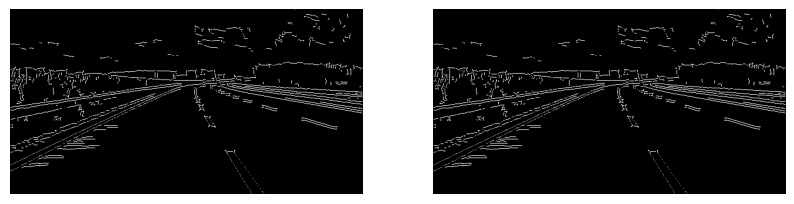

In [ ]:
# Tạo một figure với 2 subplot
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Hiển thị ảnh đầu tiên
axs[0].imshow(thresholded_image, cmap='gray')
axs[0].axis('off')  # Tắt hiển thị trục

# Hiển thị ảnh thứ hai
axs[1].imshow(final_image, cmap='gray')
axs[1].axis('off')  # Tắt hiển thị trục

# Hiển thị figure
plt.show()

### Kết hợp tất cả các bước



#### Lời giải bài tập 6


In [ ]:
def canny_edge_detection(image, low_threshold_ratio=0.05, high_threshold_ratio=0.15, sigma=1.4):

    # Làm mờ ảnh bằng cách áp dụng bộ lọc Gaussian
    blurred_image = gaussian_blur(image, sigma=sigma)

    # Tính Gradient
    gradient_magnitude, gradient_direction = gradient(blurred_image)

    # Không cực đại hóa
    nms_image = non_maximum_suppression(gradient_magnitude, gradient_direction)

    # Chọn threshold
    low_threshold = low_threshold_ratio * nms_image.max()
    high_threshold = high_threshold_ratio * nms_image.max()

    # Nhận diện cạnh
    thresholded_image = double_threshold(nms_image, low_threshold, high_threshold)
    final_image = edge_tracking(thresholded_image)
    return final_image

In [ ]:
# Load image and convert to grayscale
image = cv2.imread('/road_2.jpg', cv2.IMREAD_GRAYSCALE)
edges = canny_edge_detection(image)

#### Kết quả

In [ ]:
# Tạo một figure với 2 subplot
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Hiển thị ảnh đầu tiên
axs[0].imshow(image, cmap='gray')
axs[0].axis('off')  # Tắt hiển thị trục

# Hiển thị ảnh thứ hai
axs[1].imshow(edges, cmap='gray')
axs[1].axis('off')  # Tắt hiển thị trục

# Hiển thị figure
plt.show()

### Sử dụng hàm có sẵn trong thư viện OpenCV



#### Lời giải bài tập 7


In [ ]:
# Load image and convert to grayscale
image = cv2.imread('/road_2.jpg', cv2.IMREAD_GRAYSCALE)
canny_img = cv2.Canny(image, 150, 450)

#### Kết quả

In [ ]:
# Tạo một figure với 2 subplot
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Hiển thị ảnh đầu tiên
axs[0].imshow(image, cmap='gray')
axs[0].axis('off')  # Tắt hiển thị trục

# Hiển thị ảnh thứ hai
axs[1].imshow(canny_img, cmap='gray')
axs[1].axis('off')  # Tắt hiển thị trục

# Hiển thị figure
plt.show()

### Áp dụng Canny vào video


#### Lời giải bài tập 8

In [ ]:
# Đường dẫn đến video đầu vào và video đầu ra
input_video_path = '/road.mp4'
output_video_path = 'output_video_canny.mp4'

# Mở video đầu vào
cap = cv2.VideoCapture(input_video_path)

# Lấy thông tin về định dạng của video đầu vào
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')

# Tạo đối tượng VideoWriter để ghi video đầu ra
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height), isColor=False)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Chuyển đổi khung hình sang ảnh xám
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Cách 1: Áp dụng bộ lọc Canny edge detection tự code
    # edges = canny_edge_detection(gray_frame)

    # Cách 2: Áp dụng bộ lọc Canny edge detection có sẵn trong thư viện
    edges = cv2.Canny(gray_frame, 150, 450)

    # Ghi khung hình đã xử lý vào video đầu ra
    out.write(edges)

# Giải phóng các tài nguyên
cap.release()
out.release()
cv2.destroyAllWindows()
